In [2]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [1]:
# 1- Entendimento do desafio
# 2- Entendimento da Área/Empresa
# 3- Extraçao/Obtençao de dados

import pandas as pd

tabela = pd.read_csv('advertising.csv')
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


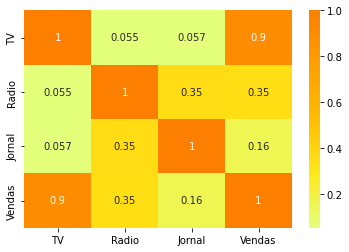

In [5]:
# 4- Tratamento de dados

import seaborn as sns
import matplotlib.pyplot as plt

# Cria gráfico
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)

# Exibe gráfico
plt.show()

In [12]:
# Separando os dados para criar um modelo de IA
y = tabela['Vendas']
x = tabela[['TV', 'Radio', 'Jornal']]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar modelos
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinar modelos
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [16]:
# Testar o modelo
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn import metrics

print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.9167161563358135
0.9779548923056425


<function matplotlib.pyplot.show(close=None, block=None)>

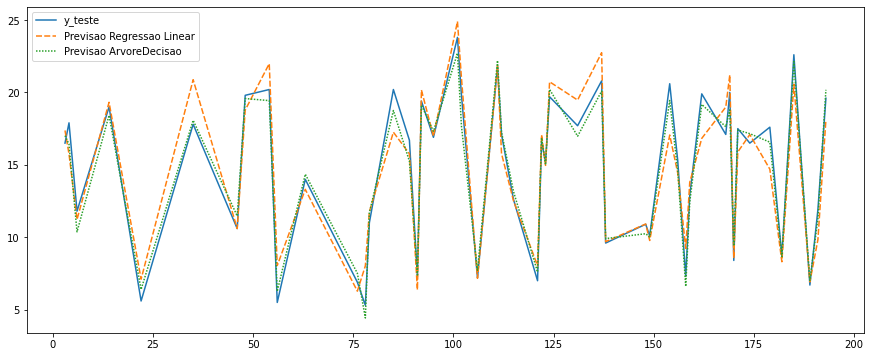

In [21]:
# Visualizaçao gráfica das previsoes
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsao Regressao Linear'] = previsao_regressaolinear
tabela_auxiliar['Previsao ArvoreDecisao'] = previsao_arvoredecisao

plt.figure(figsize=(15, 6))
sns.lineplot(data=tabela_auxiliar)
plt.show

In [25]:
# Fazendo uma nova previsao
# Importar nova tabela

nova_tabela = pd.read_csv('novos.csv')
display(nova_tabela)

# Usar o modelo arvore decisao
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.373  8.955 20.115]


Se investido 23mil em TV, 3mil em radio, 69mil em jornal, a venda será 7milhoes

Se investido 44mil em TV, 0 em radio, 5mil em jornal, a venda será 9milhoes

Se investido 170mil em TV, 45 em radio, 0 em jornal, a venda será 20milhoes